## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
df = pd.read_excel("startup-expansion.xlsx")
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


#### From Columns that collected about startups. I know that each row is about store is opened in city in specific state and explains if this store is new or old. Also explains money that spend in marketing and revenue from this store.

#### From this data, I put a main question to answer it using analysis.
#### **The Main Question** : I want to know if I can expand in a city or not based on Marketing Spend and Revenue.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
df.columns

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns = df.columns.str.replace(" ", "_")

In [7]:
df.columns

Index(['store_id', 'city', 'state', 'sales_region', 'new_expansion',
       'marketing_spend', 'revenue'],
      dtype='object')

- In the above cell, I check column names and makes its carachter small and replace spaces with underscore to make it easier to deal with data.

In [8]:
df.dtypes

store_id            int64
city               object
state              object
sales_region       object
new_expansion      object
marketing_spend     int64
revenue             int64
dtype: object

- In the above cell, I checked data types of columns and there aren't need any modification.

In [9]:
df.set_index('store_id', inplace=True)

- I put store_id as index because it's unique values

In [10]:
df[['marketing_spend', 'revenue']].describe().round(2)

,marketing_spend,revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


- In the above cell, I want to know some statistics about these two colums.
- mean in Marketing Spend approximately equals to median --> This refers to that data in this column is normally distributed.
- but in revenue column, it's possible to be skewed.

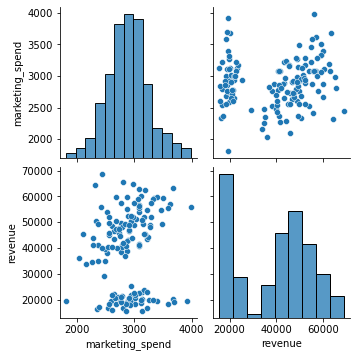

In [11]:
sns.pairplot(data=df)

- Marketing Spend is normally distributed as we discussed. 
- Revenue isn't normally distributed.

## Preprocessing Data

- Now, I will explore the other columns

In [12]:
df['city'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [13]:
df['city'].nunique()

149

In [14]:
df['city'].value_counts()

Rochester        2
Billings         1
Shreveport       1
Topeka           1
Green Bay        1
                ..
Oceanside        1
New Haven        1
Santa Clarita    1
Fullerton        1
Renton           1
Name: city, Length: 149, dtype: int64

- In city column, I found that Rochester city is appeared twice so I need if there are duplication or there are two store in this city so it's appeard twice.

In [15]:
df['state'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Illinois           5
Colorado           5
Connecticut        4
New Jersey         4
Georgia            4
Alabama            4
South Carolina     3
Tennessee          3
Utah               3
Arizona            3
Iowa               3
Michigan           3
Kansas             3
Massachusetts      3
New York           3
Louisiana          2
Ohio               2
Oregon             2
North Carolina     2
Virginia           2
Wisconsin          1
Mississippi        1
Arkansas           1
Montana            1
New Mexico         1
Minnesota          1
South Dakota       1
Rhode Island       1
Oklahoma           1
New Hampshire      1
Indiana            1
Name: state, dtype: int64

- California state has the largest number of stores in it.

In [16]:
df['state'].nunique()

35

- There are 35 state and 149 city that contain stores

In [17]:
df['sales_region'].value_counts()

Region 2    86
Region 1    64
Name: sales_region, dtype: int64

In [18]:
df['new_expansion'].value_counts()

Old    140
New     10
Name: new_expansion, dtype: int64

- There are 140 old store and 10 new store.

In [19]:
df.isnull().sum()

city               0
state              0
sales_region       0
new_expansion      0
marketing_spend    0
revenue            0
dtype: int64

In [20]:
df.duplicated().sum()

0

- There are no missing values and no duplication in data.

## Exploring and Analyzing Data

In [21]:
df.sample(10)

,city,state,sales_region,new_expansion,marketing_spend,revenue
store_id,,,,,,
65,El Cajon,California,Region 2,Old,2950,19529
6,Yonkers,New York,Region 1,Old,3080,53827
120,Santa Clarita,California,Region 2,Old,2967,51882
56,Thornton,Colorado,Region 2,Old,2642,46490
126,Sandy Springs,Georgia,Region 1,Old,2759,18942
26,Port St. Lucie,Florida,Region 1,Old,2420,55790
70,Centennial,Colorado,Region 2,Old,3697,18966
47,Roseville,California,Region 2,Old,3220,43397
64,Little Rock,Arkansas,Region 2,Old,2440,68828


<AxesSubplot:>

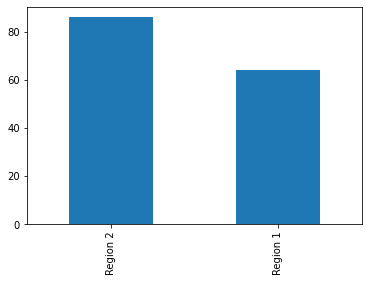

In [22]:
df['sales_region'].value_counts().plot.bar()

- This graph explains number of stores in each region
- Stores in Region2 are greater that stores in Region1

- Now, I want to know on what basis a new store will be opened?

In [23]:
df[df['new_expansion'] == 'Old'].groupby(['state']).sum()['revenue'].nlargest(10)

state
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: revenue, dtype: int64

In [24]:
df[df['new_expansion'] == 'New'].groupby(['state']).sum()['revenue'].nlargest(10)

state
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: revenue, dtype: int64

- I used the above to codes to compare and know if they open a new store based on revene but this is not the reason because there is no similarity between two.

- So, I want to creat a new column to calculate profit from these two columns (Marketing Spend, Revenue)

In [25]:
df['profit'] = df['revenue'] - df['marketing_spend']

In [26]:
df[df['new_expansion'] == 'Old'].groupby(['state']).max()['profit'].nlargest(10)

state
Arkansas         66388
Michigan         62667
California       61984
New York         61922
Rhode Island     59146
Alabama          57228
Massachusetts    57165
Kansas           57018
Washington       55622
Virginia         54867
Name: profit, dtype: int64

In [27]:
df[df['new_expansion'] == 'New'].groupby(['state']).max()['profit'].nlargest(10)

state
Texas         59473
Tennessee     51770
California    49421
Arizona       46043
Illinois      45036
New Jersey    32352
Name: profit, dtype: int64

In [28]:
df['ROMS'] = round((df['profit'] / df['marketing_spend']) * 100, 2)

- ROMS -> Return of marketing spend.

In [29]:
df['ROMS%'] = round((df['ROMS'] / 100), 2) 

In [30]:
df.sample()

,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,ROMS,ROMS%
store_id,,,,,,,,,
64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2720.82,27.21


- Conclusion, Opening a New Expansion doesn't depend on profit.

In [31]:
df.to_csv('startup-expansion-modified.csv')